In [29]:
import json
import matplotlib.pyplot as plt
import numpy as np
import itertools

model_pad_path = 'models_pad/'
model_path_all = 'models/'
model_path = model_path_all #路径选择
test_path =  model_path + 'test_data.json'
data = json.load(open(test_path,'r'))
cm = np.array(data['confusion matrix'],dtype = int)

acc = np.trace(cm)/np.sum(cm)
miss = 1 - acc
labels_name = ['NEGATIVE','COCO','POSITIVE']

In [30]:
def plot_confusion_matrix(cm, labels_name, title = 'Confusion Matrix', cmap = 'Blues', normalize = True):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5,4))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    num_local = np.array(range(len(labels_name)))    
    plt.xticks(num_local, labels_name)    # 将标签印在x轴坐标上
    plt.yticks(num_local, labels_name)    # 将标签印在y轴坐标上
    plt.ylabel('True Label')    
    plt.xlabel('Predicted Label')

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.savefig(model_path + 'confusion_matrix.pdf')

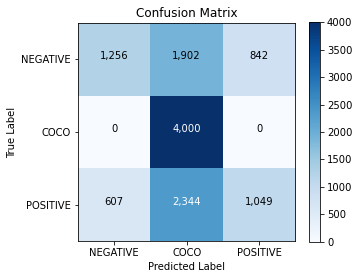

In [31]:
plot_confusion_matrix(cm, labels_name, normalize = False)